In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url='https://raw.githubusercontent.com/Fuad3004/Data_Science_with_python/main/Predict%20Diamond%20Price/Diamon%20Price.csv'
df = pd.read_csv(url)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#EDA

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


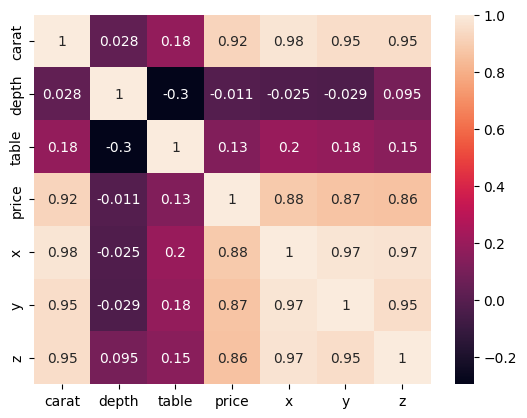

In [ ]:
sns.heatmap(df.corr(),annot=True);

#Feature Engineering

In [ ]:
df['symmetry'] = df['x']/df['y']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [ ]:
df = df.dropna(axis=0)


In [ ]:
df_trans=pd.get_dummies(df)
X = df_trans.drop(['price','x','y','z'],axis=1)
y=df_trans['price']
features = X.columns


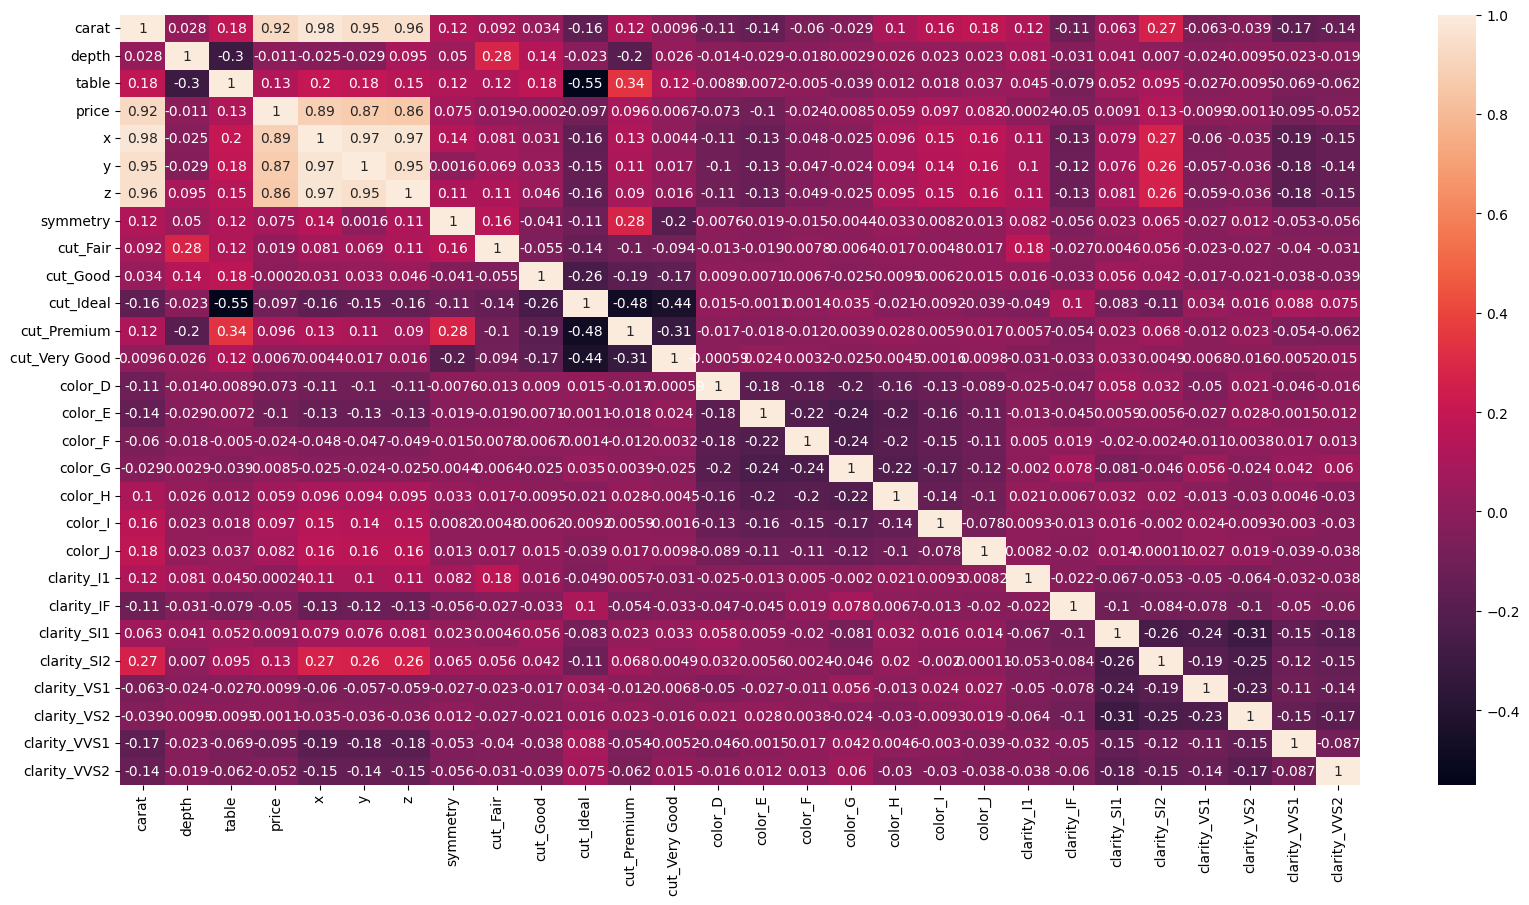

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_trans.corr(),annot=True);

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
#scale the data
s = StandardScaler()
X = s.fit_transform(X)

In [ ]:
X

array([[-1.19812283, -0.17405623, -1.0998064 , ..., -0.5422832 ,
        -0.26958204, -0.32197693],
       [-1.24031884, -1.36080279,  1.5859211 , ..., -0.5422832 ,
        -0.26958204, -0.32197693],
       [-1.19812283, -3.38525281,  3.37640611, ..., -0.5422832 ,
        -0.26958204, -0.32197693],
       ...,
       [-0.20651658,  0.73345584,  1.13829985, ..., -0.5422832 ,
        -0.26958204, -0.32197693],
       [ 0.1310515 , -0.52309934,  0.24305735, ..., -0.5422832 ,
        -0.26958204, -0.32197693],
       [-0.10102656,  0.31460412, -1.0998064 , ..., -0.5422832 ,
        -0.26958204, -0.32197693]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [ ]:
ypred_null = y_train.mean()

In [ ]:
ypred_null

3923.584241884843

#K-Neighbours Regressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([ 1993.8,  1381.4,  2663.6, ...,  4833.3,  3270.4, 11606.2])

#Random Forrest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)

In [ ]:
y_pred2

array([ 1993.8,  1381.4,  2663.6, ...,  4833.3,  3270.4, 11606.2])

#Linear Regression

In [ ]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

#Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)

#RESULT

In [ ]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval


,RMSE
KNN,558.869097
MLR,1151.745611
RF,558.869097
Lasso,1151.783551
NULL,3923.584242


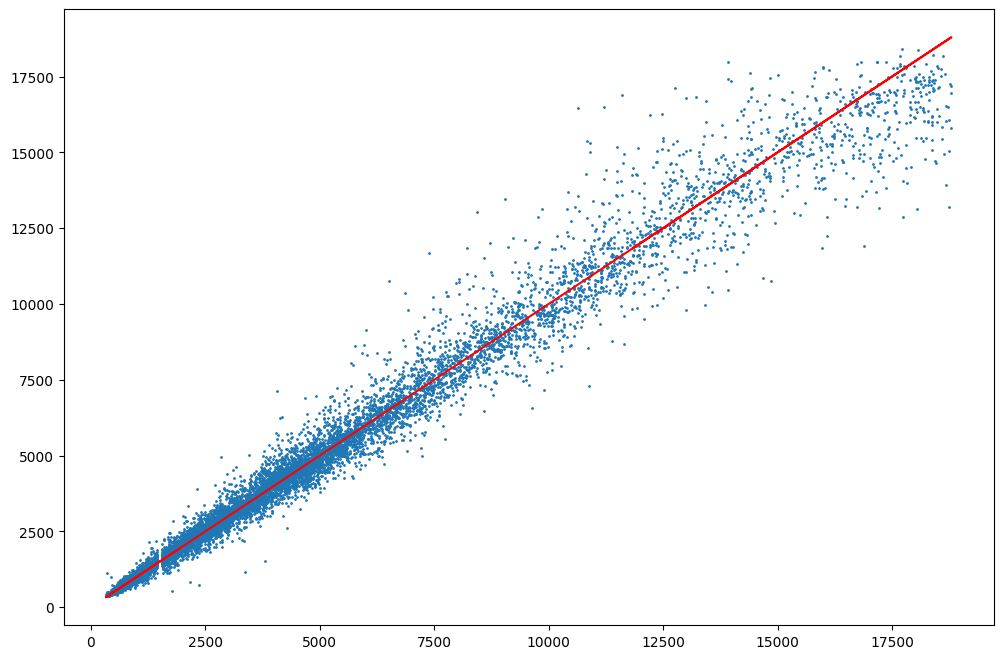

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

<ipython-input-46-ec4621a522f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='price', ylabel='Density'>

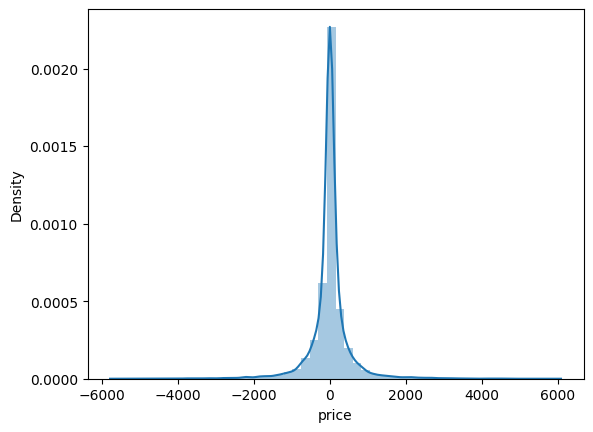

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [ ]:
#features importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
ExtraTreesRegressor()

ExtraTreesRegressor()

In [ ]:
model.feature_importances_.tolist()

[0.8807102736380049,
 0.00407943124644503,
 0.004320277787273973,
 0.004865121413601517,
 0.001171551912035361,
 0.000654785689727657,
 0.002335436107398136,
 0.0009382652456851784,
 0.0005222583296338451,
 0.0038378127976283036,
 0.003925365463859055,
 0.00186717040383713,
 0.0031516351015477943,
 0.006310896235849051,
 0.008634113289697841,
 0.009660090405180946,
 0.014833165314361947,
 0.003153394874753793,
 0.012338272719358747,
 0.017100794424972938,
 0.004204024765843972,
 0.005376043443162629,
 0.002609172489277437,
 0.0034006469008628585]